# Popularity of Music Records

<img src="images/music.jpg"/>

The music industry has a well-developed market with a global annual revenue around $15 billion. The recording industry is highly competitive and is dominated by three big production companies which make up nearly 82% of the total annual album sales.

Artists are at the core of the music industry and record labels provide them with the necessary resources to sell their music on a large scale. A record label incurs numerous costs (studio recording, marketing, distribution, and touring) in exchange for a percentage of the profits from album sales, singles and concert tickets.

Unfortunately, the success of an artist's release is highly uncertain: a single may be extremely popular, resulting in widespread radio play and digital downloads, while another single may turn out quite unpopular, and therefore unprofitable.

Knowing the competitive nature of the recording industry, record labels face the fundamental decision problem of which musical releases to support to maximize their financial success.

How can we use analytics to predict the popularity of a song? In this assignment, we challenge ourselves to predict whether a song will reach a spot in the Top 10 of the Billboard Hot 100 Chart.

Taking an analytics approach, we aim to use information about a song's properties to predict its popularity. The dataset songs.csv consists of all songs which made it to the Top 10 of the Billboard Hot 100 Chart from 1990-2010 plus a sample of additional songs that didn't make the Top 10. This data comes from three sources: Wikipedia, Billboard.com, and EchoNest.

The variables included in the dataset either describe the artist or the song, or they are associated with the following song attributes: time signature, loudness, key, pitch, tempo, and timbre.

Here's a detailed description of the variables:

    year = the year the song was released

    songtitle = the title of the song

    artistname = the name of the artist of the song

    songID and artistID = identifying variables for the song and artist

    timesignature and timesignature_confidence = a variable estimating the time signature of the song, and the confidence in the estimate

    loudness = a continuous variable indicating the average amplitude of the audio in decibels

    tempo and tempo_confidence = a variable indicating the estimated beats per minute of the song, and the confidence in the estimate

    key and key_confidence = a variable with twelve levels indicating the estimated key of the song (C, C#, . . ., B), and the confidence in the estimate

    energy = a variable that represents the overall acoustic energy of the song, using a mix of features such as loudness

    pitch = a continuous variable that indicates the pitch of the song

    timbre_0_min, timbre_0_max, timbre_1_min, timbre_1_max, . . . , timbre_11_min, and timbre_11_max = variables that indicate the minimum/maximum values over all segments for each of the twelve values in the timbre vector (resulting in 24 continuous variables)

    Top10 = a binary variable indicating whether or not the song made it to the Top 10 of the Billboard Hot 100 Chart (1 if it was in the top 10, and 0 if it was not)

### Problem 1.1 - Understanding the Data

Use the read.csv function to load the dataset "songs.csv" into R.

In [1]:
songs = read.csv("data/songs.csv")
head(songs)

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,⋯,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,⋯,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
2,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,⋯,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
3,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,⋯,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
4,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,⋯,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
5,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,⋯,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0
6,2010,Better Off This Way,A Day to Remember,SOCEYON1315CD4A23E,AROBSHL1187B9AFB01,4,1.000,-3.807,160.366,0.347,⋯,91.117,-54.378,53.808,-33.183,54.657,-64.478,34.522,-40.922,36.453,0


In [2]:
str(songs)

'data.frame':	7574 obs. of  39 variables:
 $ year                    : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...
 $ songtitle               : Factor w/ 7141 levels "'03 Bonnie & Clyde",..: 6204 5522 241 3098 47 607 254 4419 2887 6756 ...
 $ artistname              : Factor w/ 1032 levels "50 Cent","98 Degrees",..: 3 3 3 3 3 3 3 3 3 12 ...
 $ songID                  : Factor w/ 7549 levels "SOAACNI1315CD4AC42",..: 595 5439 5252 1716 3431 1020 1831 3964 6904 2473 ...
 $ artistID                : Factor w/ 1047 levels "AR00B1I1187FB433EB",..: 671 671 671 671 671 671 671 671 671 507 ...
 $ timesignature           : int  3 4 4 4 4 4 4 4 4 4 ...
 $ timesignature_confidence: num  0.853 1 1 1 0.788 1 0.968 0.861 0.622 0.938 ...
 $ loudness                : num  -4.26 -4.05 -3.57 -3.81 -4.71 ...
 $ tempo                   : num  91.5 140 160.5 97.5 140.1 ...
 $ tempo_confidence        : num  0.953 0.921 0.489 0.794 0.286 0.347 0.273 0.83 0.018 0.929 ...
 $ key                  

In [3]:
summary(songs)

      year          songtitle              artistname  
 Min.   :1990   Intro    :  15   Various artists: 162  
 1st Qu.:1997   Forever  :   8   Anal Cunt      :  49  
 Median :2002   Home     :   7   Various Artists:  44  
 Mean   :2001   Goodbye  :   6   Tori Amos      :  41  
 3rd Qu.:2006   Again    :   5   Eels           :  37  
 Max.   :2010   Beautiful:   5   Napalm Death   :  37  
                (Other)  :7528   (Other)        :7204  
                songID                   artistID    timesignature  
 SOALSZJ1370F1A7C75:   2   ARAGWS81187FB3F768: 222   Min.   :0.000  
 SOANPAC13936E0B640:   2   ARL14X91187FB4CF14:  49   1st Qu.:4.000  
 SOBDGMX12B0B80808E:   2   AR4KS8C1187FB4CF3D:  41   Median :4.000  
 SOBUDCZ12A58A80013:   2   AR0JZZ01187B9B2C99:  37   Mean   :3.894  
 SODFRLK13134387FB5:   2   ARZGTK71187B9AC7F5:  37   3rd Qu.:4.000  
 SOEJPOK12A6D4FAFE4:   2   AR95XYH1187FB53951:  31   Max.   :7.000  
 (Other)           :7562   (Other)           :7157                  


**How many observations (songs) are from the year 2010?**

In [4]:
table(songs$year)


1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 
 328  196  186  324  198  258  178  329  380  357  363  282  518  434  479  392 
2006 2007 2008 2009 2010 
 479  622  415  483  373 

Answer: 373.

### Problem 1.2 - Understanding the Data

**How many songs does the dataset include for which the artist name is "Michael Jackson"?**

In [5]:
MJTop10 <- subset(songs,artistname=="Michael Jackson" &  Top10 == 1 )
head(MJTop10)

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,⋯,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
4329,2001,You Rock My World,Michael Jackson,SOBLCOF13134393021,ARXPPEY1187FB51DF4,4,1.000,-2.768,95.003,0.892,⋯,120.076,-53.839,63.576,-85.169,84.840,-102.185,55.266,-48.107,56.116,1
6207,1995,You Are Not Alone,Michael Jackson,SOJKNNO13737CEB162,ARXPPEY1187FB51DF4,4,1.000,-9.408,120.566,0.805,⋯,90.735,-61.583,60.920,-55.904,76.632,-69.799,46.173,-67.281,47.128,1
6210,1995,Black or White,Michael Jackson,SOBBRFO137756C9CB7,ARXPPEY1187FB51DF4,4,1.000,-4.017,115.027,0.535,⋯,107.974,-55.063,52.505,-110.999,71.477,-133.939,60.442,-55.008,43.473,1
6218,1995,Remember the Time,Michael Jackson,SOIQZMT136C9704DA5,ARXPPEY1187FB51DF4,4,1.000,-3.633,107.921,1.000,⋯,146.587,-58.117,62.157,-54.440,94.501,-112.348,90.437,-53.634,51.681,1
6915,1992,In The Closet,Michael Jackson,SOKIOOC12AF729ED9E,ARXPPEY1187FB51DF4,4,0.991,-4.315,110.501,0.949,⋯,124.354,-78.303,41.322,-83.184,106.263,-136.109,102.829,-48.192,74.575,1


In [6]:
nrow(MJTop10)

[1] 5

In [7]:
table(songs$artistname=="Michael Jackson" ,songs$Top10 == 1)

       
        FALSE TRUE
  FALSE  6442 1114
  TRUE     13    5

Answer: 18 songs, 5 in the TOP10.

### Problem 1.4 - Understanding the Data

The variable corresponding to the estimated time signature (timesignature) is discrete, meaning that it only takes integer values (0, 1, 2, 3, . . . ). 

**What are the values of this variable that occur in our dataset?**

In [8]:
table(songs$timesignature)


   0    1    3    4    5    7 
  10  143  503 6787  112   19 

The only values that appear in the table for timesignature are 0, 1, 3, 4, 5, and 7

**Which timesignature value is the most frequent among songs in our dataset?**

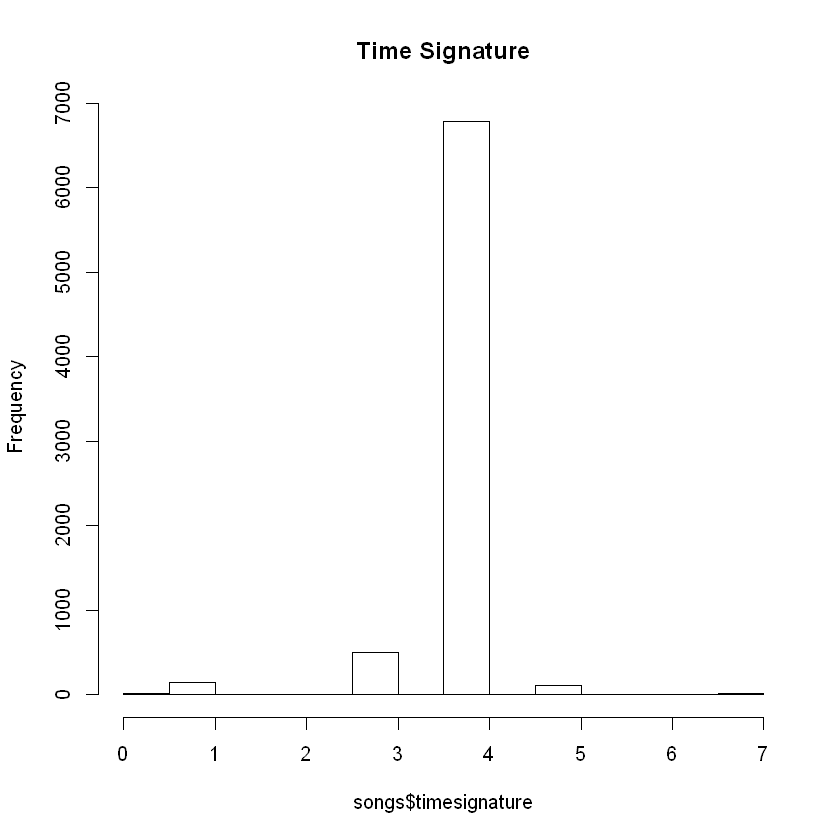

In [9]:
hist(songs$timesignature, main = "Time Signature")

In [10]:
table(songs$timesignature)


   0    1    3    4    5    7 
  10  143  503 6787  112   19 

6787 songs have a value of 4 for the timesignature.

### Problem 1.5 - Understanding the Data

**Out of all of the songs in our dataset, the song with the highest tempo is one of the following songs. Which one is it?**

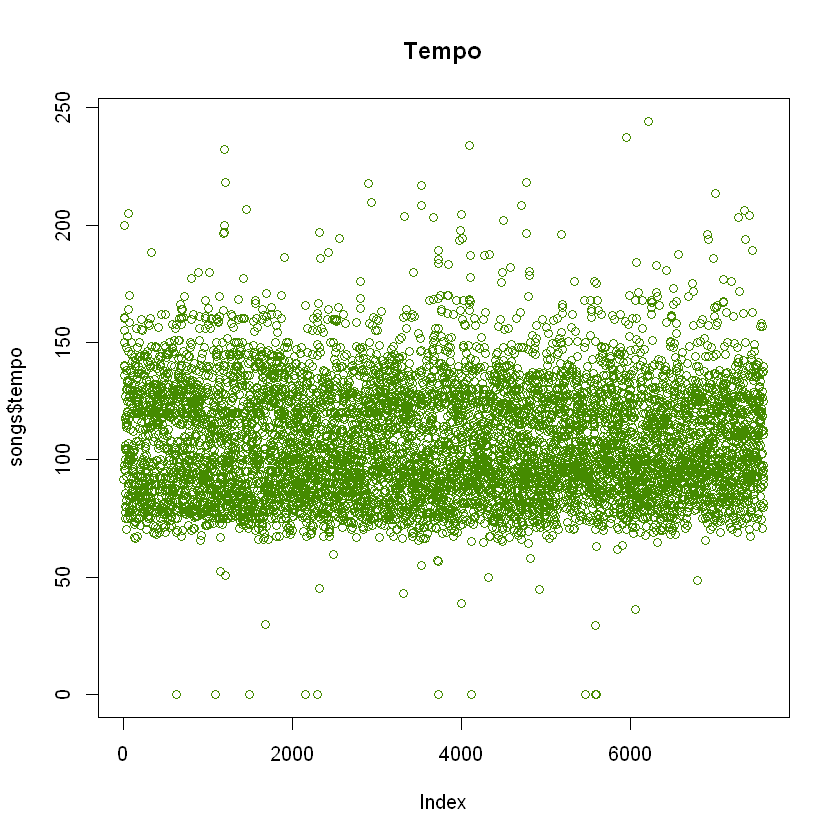

In [11]:
plot(songs$tempo, main="Tempo", col = "#458B00")

In [12]:
head(songs[order(songs$tempo , decreasing = T),])

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,⋯,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
6206,1995,Wanna Be Startin' Somethin',Michael Jackson,SONHIQM13738B7BE80,ARXPPEY1187FB51DF4,3,1.000,-14.528,244.307,0.566,⋯,93.600,-52.012,95.827,-63.554,84.129,-53.492,67.001,-73.421,67.308,0
5946,1996,Zodijackyl Light,Dark Tranquillity,SOSMMKR1373EF49777,AR27M2F1187B9B1C50,4,0.526,-11.418,237.457,0.210,⋯,58.098,-66.722,42.489,-28.941,54.068,-46.201,28.347,-37.549,32.705,0
4091,2002,You're a Fucking Bastard,The Exploited,SOCKWLO12D85320AB2,AR39QZK1187B9B1846,1,0.000,-5.677,233.982,0.338,⋯,60.900,-49.601,46.883,-26.752,55.947,-108.579,40.632,-37.253,37.228,0
1186,2008,Relentless,Strapping Young Lad,SODQTAK1377A1A8EB1,AR4IE571187FB4ECE1,4,0.000,-5.635,232.134,0.273,⋯,33.870,-28.485,31.267,-19.105,26.089,-71.759,35.007,-34.933,46.100,0
4760,2000,The Chainheart Machine,Soilwork,SOSZFZT13775661184,ARUF32D1187B9B157E,4,0.327,-7.148,218.403,0.000,⋯,78.386,-46.363,18.003,-53.302,49.581,-174.787,22.260,-39.892,30.760,0
1201,2008,Take It,Taproot,SOIEMEH131634A6F0D,ARB9VHL1187B9AEC3F,3,1.000,-4.229,218.207,0.177,⋯,68.613,-52.242,49.196,-33.076,57.878,-119.559,33.956,-33.002,39.616,0


In [13]:
songs$songtitle[which.max(songs$tempo)]

[1] Wanna Be Startin' Somethin'
7141 Levels: '03 Bonnie & Clyde '69 ... Zumbi

### Problem 2.1 - Creating Our Prediction Model

We wish to predict whether or not a song will make it to the Top 10. To do this, first use the subset function to split the data into a training set "SongsTrain" consisting of all the observations up to and including 2009 song releases, and a testing set "SongsTest", consisting of the 2010 song releases.

In [14]:
SongsTrain <- subset(songs, year<=2009)
SongsTest <- subset(songs, year>2009)

**How many observations (songs) are in the training set?**

In [15]:
nrow(SongsTrain)

[1] 7201

7201 songs are in the training set.

### Problem 2.2 - Creating our Prediction Model

In this problem, our outcome variable is "Top10" - we are trying to predict whether or not a song will make it to the Top 10 of the Billboard Hot 100 Chart. Since the outcome variable is binary, we will build a logistic regression model. We'll start by using all song attributes as our independent variables, which we'll call Model 1.

We will only use the variables in our dataset that describe the numerical attributes of the song in our logistic regression model. So we won't use the variables "year", "songtitle", "artistname", "songID" or "artistID".

We have seen in the lecture that, to build the logistic regression model, we would normally explicitly input the formula including all the independent variables in R. However, in this case, this is a tedious amount of work since we have a large number of independent variables.

There is a nice trick to avoid doing so. Let's suppose that, except for the outcome variable Top10, all other variables in the training set are inputs to Model 1. Then, we can use the formula

    SongsLog1 = glm(Top10 ~ ., data=SongsTrain, family=binomial)

to build our model. Notice that the "." is used in place of enumerating all the independent variables. (Also, keep in mind that you can choose to put quotes around binomial, or leave out the quotes. R can understand this argument either way.)

However, in our case, we want to exclude some of the variables in our dataset from being used as independent variables ("year", "songtitle", "artistname", "songID", and "artistID"). To do this, we can use the following trick. First define a vector of variable names called nonvars - these are the variables that we won't use in our model.

    nonvars = c("year", "songtitle", "artistname", "songID", "artistID")

To remove these variables from your training and testing sets, type the following commands in your R console:

    SongsTrain = SongsTrain[ , !(names(SongsTrain) %in% nonvars) ]

    SongsTest = SongsTest[ , !(names(SongsTest) %in% nonvars) ]

Now, use the glm function to build a logistic regression model to predict Top10 using all of the other variables as the independent variables. You should use SongsTrain to build the model.

In [16]:
nonvars = c("year", "songtitle", "artistname", "songID", "artistID")

SongsTrain = SongsTrain[ , !(names(SongsTrain) %in% nonvars) ]

SongsTest = SongsTest[ , !(names(SongsTest) %in% nonvars) ]

In [17]:
SongsLog1 = glm(Top10 ~ ., data=SongsTrain, family=binomial)
summary(SongsLog1)


Call:
glm(formula = Top10 ~ ., family = binomial, data = SongsTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9220  -0.5399  -0.3459  -0.1845   3.0770  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.470e+01  1.806e+00   8.138 4.03e-16 ***
timesignature             1.264e-01  8.674e-02   1.457 0.145050    
timesignature_confidence  7.450e-01  1.953e-01   3.815 0.000136 ***
loudness                  2.999e-01  2.917e-02  10.282  < 2e-16 ***
tempo                     3.634e-04  1.691e-03   0.215 0.829889    
tempo_confidence          4.732e-01  1.422e-01   3.329 0.000873 ***
key                       1.588e-02  1.039e-02   1.529 0.126349    
key_confidence            3.087e-01  1.412e-01   2.187 0.028760 *  
energy                   -1.502e+00  3.099e-01  -4.847 1.25e-06 ***
pitch                    -4.491e+01  6.835e+00  -6.570 5.02e-11 ***
timbre_0_min              2.316e-02  4.256e-03   5.44

**Looking at the summary of your model, what is the value of the Akaike Information Criterion (AIC)?**

In [18]:
summary(SongsLog1)$aic

[1] 4827.154

### Problem 2.3 - Creating Our Prediction Model

Let's now think about the variables in our dataset related to the confidence of the time signature, key and tempo (timesignature_confidence, key_confidence, and tempo_confidence). Our model seems to indicate that these confidence variables are significant (rather than the variables timesignature, key and tempo themselves). **What does the model suggest?**

If you look at the output summary(model), where model is the name of your logistic regression model, you can see that the coefficient estimates for the confidence variables (*timesignature_confidence*, *key_confidence*, and *tempo_confidence*) are positive. This means that higher confidence leads to a higher predicted probability of a Top 10 hit.

### Problem 2.4 - Creating Our Prediction Model

In general, if the confidence is low for the time signature, tempo, and key, then the song is more likely to be complex. **What does Model 1 suggest in terms of complexity?**

Since the coefficient values for timesignature_confidence, tempo_confidence, and key_confidence are all positive, lower confidence leads to a lower predicted probability of a song being a hit. So mainstream listeners tend to prefer less complex songs.

### Problem 2.5 - Creating Our Prediction Model

Songs with heavier instrumentation tend to be louder (have higher values in the variable "loudness") and more energetic (have higher values in the variable "energy").

**By inspecting the coefficient of the variable "loudness", what does Model 1 suggest?**

The coefficient estimate for loudness is positive, meaning that mainstream listeners prefer louder songs, which are those with heavier instrumentation. 

### Problem 3.1 - Beware of Multicollinearity Issues!

**What is the correlation between the variables "loudness" and "energy" in the training set?**

In [19]:
cor(SongsTrain$loudness,  SongsTrain$energy)

[1] 0.7399067

Given that these two variables are highly correlated, Model 1 suffers from multicollinearity. To avoid this issue, we will omit one of these two variables and rerun the logistic regression. In the rest of this problem, we'll build two variations of our original model: Model 2, in which we keep "energy" and omit "loudness", and Model 3, in which we keep "loudness" and omit "energy".

### Problem 3.2 - Beware of Multicollinearity Issues!

Create Model 2, which is Model 1 without the independent variable "loudness". This can be done with the following command:

    SongsLog2 = glm(Top10 ~ . - loudness, data=SongsTrain, family=binomial)

We just subtracted the variable loudness. We couldn't do this with the variables "songtitle" and "artistname", because they are not numeric variables, and we might get different values in the test set that the training set has never seen. But this approach (subtracting the variable from the model formula) will always work when you want to remove numeric variables.

In [20]:
SongsLog2 = glm(Top10 ~ . - loudness, data=SongsTrain, family=binomial)
summary(SongsLog2)


Call:
glm(formula = Top10 ~ . - loudness, family = binomial, data = SongsTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0983  -0.5607  -0.3602  -0.1902   3.3107  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -2.241e+00  7.465e-01  -3.002 0.002686 ** 
timesignature             1.625e-01  8.734e-02   1.860 0.062873 .  
timesignature_confidence  6.885e-01  1.924e-01   3.578 0.000346 ***
tempo                     5.521e-04  1.665e-03   0.332 0.740226    
tempo_confidence          5.497e-01  1.407e-01   3.906 9.40e-05 ***
key                       1.740e-02  1.026e-02   1.697 0.089740 .  
key_confidence            2.954e-01  1.394e-01   2.118 0.034163 *  
energy                    1.813e-01  2.608e-01   0.695 0.486991    
pitch                    -5.150e+01  6.857e+00  -7.511 5.87e-14 ***
timbre_0_min              2.479e-02  4.240e-03   5.847 5.01e-09 ***
timbre_0_max             -1.007e-01  1.178

**Look at the summary of SongsLog2, and inspect the coefficient of the variable "energy". What do you observe?**

However, the coefficient estimate for energy is negative, meaning that mainstream listeners prefer songs that are less energetic, which are those with light instrumentation. These coefficients lead us to different conclusions!

### Problem 3.3 - Beware of Multicollinearity Issues!

Now, create Model 3, which should be exactly like Model 1, but without the variable "energy".

In [21]:
SongsLog3 = glm(Top10 ~ . - energy, data=SongsTrain, family=binomial)
summary(SongsLog3)


Call:
glm(formula = Top10 ~ . - energy, family = binomial, data = SongsTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9182  -0.5417  -0.3481  -0.1874   3.4171  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.196e+01  1.714e+00   6.977 3.01e-12 ***
timesignature             1.151e-01  8.726e-02   1.319 0.187183    
timesignature_confidence  7.143e-01  1.946e-01   3.670 0.000242 ***
loudness                  2.306e-01  2.528e-02   9.120  < 2e-16 ***
tempo                    -6.460e-04  1.665e-03  -0.388 0.698107    
tempo_confidence          3.841e-01  1.398e-01   2.747 0.006019 ** 
key                       1.649e-02  1.035e-02   1.593 0.111056    
key_confidence            3.394e-01  1.409e-01   2.409 0.015984 *  
pitch                    -5.328e+01  6.733e+00  -7.914 2.49e-15 ***
timbre_0_min              2.205e-02  4.239e-03   5.200 1.99e-07 ***
timbre_0_max             -3.105e-01  2.537e-

Look at the summary of Model 3 and inspect the coefficient of the variable "loudness". Remembering that higher loudness and energy both occur in songs with heavier instrumentation, **do we make the same observation about the popularity of heavy instrumentation as we did with Model 2?**

Yes, we can see that loudness has a positive coefficient estimate, meaning that our model predicts that songs with heavier instrumentation tend to be more popular.

### Problem 4.1 - Validating Our Model

Make predictions on the test set using Model 3. **What is the accuracy of Model 3 on the test set, using a threshold of 0.45?** (Compute the accuracy as a number between 0 and 1.)

In [22]:
Predict <- predict(SongsLog3, newdata = SongsTest, type='response')

table(Predict >0.45 , SongsTest$Top10)

       
          0   1
  FALSE 309  40
  TRUE    5  19

                  Predict 0       Predict 1
    Actual 0    True Negative   False Positive
    Actual 1    False Negative  True Positive

In [23]:
sum(diag(table(Predict >0.45 , SongsTest$Top10)))/nrow(SongsTest)

[1] 0.8793566

Or

In [24]:
# Compute Accuracy Directly

zp <- table(Predict >0.45 , SongsTest$Top10)

Accuracy = sum(diag(zp))/sum(zp)
Accuracy

[1] 0.8793566

### Problem 4.2 - Validating Our Model

Let's check if there's any incremental benefit in using Model 3 instead of a baseline model. Given the difficulty of guessing which song is going to be a hit, an easier model would be to pick the most frequent outcome (a song is not a Top 10 hit) for all songs. **What would the accuracy of the baseline model be on the test set?** (Give your answer as a number between 0 and 1.)

In [25]:
ztest = table(SongsTest$Top10)
ztest

Accuracy = ztest[1]/sum(ztest)
Accuracy


  0   1 
314  59 

0 
0.8418231

Another way:

In [26]:
mean(SongsTest$Top10)

[1] 0.1581769

In [27]:
1-mean(SongsTest$Top10)

[1] 0.8418231

### Problem 4.3 - Validating Our Model

It seems that Model 3 gives us a small improvement over the baseline model. Still, does it create an edge?

Let's view the two models from an investment perspective. A production company is interested in investing in songs that are highly likely to make it to the Top 10. The company's objective is to minimize its risk of financial losses attributed to investing in songs that end up unpopular.

A competitive edge can therefore be achieved if we can provide the production company a list of songs that are highly likely to end up in the Top 10. We note that the baseline model does not prove useful, as it simply does not label any song as a hit. Let us see what our model has to offer.

**How many songs does Model 3 correctly predict as Top 10 hits in 2010 (remember that all songs in 2010 went into our test set), using a threshold of 0.45?**

In [28]:
Prediction <- table(Predict >0.45 , SongsTest$Top10)
Prediction

       
          0   1
  FALSE 309  40
  TRUE    5  19

                  Predict 0       Predict 1
    Actual 0    True Negative   False Positive
    Actual 1    False Negative  True Positive

In [29]:
Prediction[2,2]

[1] 19

**How many non-hit songs does Model 3 predict will be Top 10 hits (again, looking at the test set), using a threshold of 0.45?**

In [30]:
table(Predict >0.45 , SongsTest$Top10)

       
          0   1
  FALSE 309  40
  TRUE    5  19

In [31]:
table(Predict >0.45 , SongsTest$Top10)[2,1]

[1] 5

### Problem 4.4 - Validating Our Model

**What is the sensitivity of Model 3 on the test set, using a threshold of 0.45?**

Sensitivity = $\frac{TP}{TP + FN}$ (measures the percentage of actual poor care cases that we classify correctly)

                  Predict 0       Predict 1
    Actual 0    True Negative   False Positive
    Actual 1    False Negative  True Positive

In [32]:
Prediction[2,2]/sum(Prediction[,2])

[1] 0.3220339

**What is the specificity of Model 3 on the test set, using a threshold of 0.45?**

Specifity = $\frac{TN}{TN + FP}$ (measures the percentage of actual good care cases that we classify correctly)

In [33]:
Prediction[1,1]/sum(Prediction[,1])

[1] 0.9840764

### Problem 4.5 - Validating Our Model

**What conclusions can you make about our model?** (Select all that apply.)

Model 3 favors specificity over sensitivity.

Model 3 provides conservative predictions, and predicts that a song will make it to the Top 10 very rarely. So while it detects less than half of the Top 10 songs, we can be very confident in the songs that it does predict to be Top 10 hits.